# Working with PDB Structures in Pandas

Let's start by loading up a PDB structure from my favourite OPIG tool, the [STCRDab](https://opig.stats.ox.ac.uk/webapps/stcrdab-stcrpred/)! Here we will look at [PDB ID 6eqb](https://opig.stats.ox.ac.uk/webapps/stcrdab-stcrpred/StrViewer?pdb=6eqb). It is a crystal structure of a T cell receptor interacting with a peptide presented by an MHC class I molecule.

In [1]:
import nglview

In [2]:
view = nglview.show_file('data/6eqb.pdb')
view

NGLWidget()

Now let's load this molecules into a pandas dataframe and do some analysis. The PDB data is loaded into columns in a similar way that PDB files are formatted as columns.

In [3]:
from python_pdb.parsers import parse_pdb_to_pandas

In [4]:
with open('data/6eqb.pdb', 'r') as fh:
    structure_df = parse_pdb_to_pandas(fh.read())

structure_df

,record_type,atom_number,atom_name,alt_loc,residue_name,chain_id,residue_seq_id,residue_insert_code,pos_x,pos_y,pos_z,occupancy,b_factor,element,charge
0,ATOM,1,N,A,ALA,C,2,None,48.681,-11.013,29.600,0.5,30.86,N,None
1,ATOM,2,CA,A,ALA,C,2,None,49.343,-9.708,29.330,0.5,29.82,C,None
2,ATOM,3,C,A,ALA,C,2,None,49.310,-8.792,30.562,0.5,29.16,C,None
3,ATOM,4,O,A,ALA,C,2,None,48.668,-9.107,31.537,0.5,29.75,O,None
4,ATOM,5,CB,A,ALA,C,2,None,48.679,-9.044,28.146,0.5,29.57,C,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6644,HETATM,6645,O,None,HOH,B,128,None,63.467,-9.052,4.232,1.0,46.86,O,None
6645,HETATM,6646,O,None,HOH,B,129,None,64.998,-3.887,10.735,1.0,48.05,O,None
6646,HETATM,6647,O,None,HOH,B,130,None,69.089,-37.773,1.079,1.0,63.55,O,None
6647,HETATM,6648,O,None,HOH,B,131,None,70.137,-40.643,1.067,1.0,59.75,O,None


To start things off, let's clean up this structure by highlighting one of the most powerful aspects of this approach: querying. As you can seen from the data frame above- there are water molecules in the structure that we might not care about. Let's remove them...

In [5]:
structure_df_clean = structure_df.query("record_type == 'ATOM'")  # or "residue_name != 'HOH'" would have worked as well
structure_df_clean.tail()

,record_type,atom_number,atom_name,alt_loc,residue_name,chain_id,residue_seq_id,residue_insert_code,pos_x,pos_y,pos_z,occupancy,b_factor,element,charge
6633,ATOM,6634,CB,None,MET,B,125,None,74.125,-32.337,9.293,1.0,121.02,C,None
6634,ATOM,6635,CG,None,MET,B,125,None,73.143,-31.632,10.263,1.0,116.33,C,None
6635,ATOM,6636,SD,None,MET,B,125,None,71.379,-32.103,10.373,1.0,113.91,S,None
6636,ATOM,6637,CE,None,MET,B,125,None,70.626,-31.028,9.134,1.0,109.06,C,None
6637,ATOM,6638,OXT,None,MET,B,125,None,74.839,-34.197,6.246,1.0,130.70,O,None


By using pandas' built in querying function- we can easily get rid of the HETATMs in the file that we might not care about. We can also use this querying to just select the TCR or pMHC to perform analysis on this molecule seperately. In this example, the TCR $\alpha$- and $\beta$ chain is labelled as chains D and E repectively. The MHC molecule is chain A (B- representing the $\beta_2$m) and C the peptide.

In [6]:
!head -n5 data/6eqb.pdb

REMARK   5 IMGT RENUMBERED STRUCTURE 6EQB GENERATED BY STCRDAB
REMARK   5 TCR CHAINS ARE RENUMBERED IN THE VARIABLE REGIONS ONLY
REMARK   5 MHC CHAINS ARE RENUMBERED IN THE G DOMAINS OR FOR B2M-GLOBULIN
REMARK   5 NON-TCR AND NON-MHC CHAINS ARE LEFT WITH RESIDUE IDS AS IN PDB
REMARK   5 PAIRED_ABTCR BCHAIN=E ACHAIN=D MHCCHAINS=AB AGCHAIN=C AGTYPE=PEPTIDE


In [7]:
tcr_df = structure_df_clean.query("chain_id == 'D' or chain_id == 'E'")
tcr_df

,record_type,atom_number,atom_name,alt_loc,residue_name,chain_id,residue_seq_id,residue_insert_code,pos_x,pos_y,pos_z,occupancy,b_factor,element,charge
57,ATOM,58,N,None,SER,E,1,None,44.786,19.936,31.694,1.0,91.71,N,None
58,ATOM,59,CA,None,SER,E,1,None,43.328,20.085,31.879,1.0,88.14,C,None
59,ATOM,60,C,None,SER,E,1,None,42.582,19.234,30.860,1.0,80.31,C,None
60,ATOM,61,O,None,SER,E,1,None,41.944,19.762,29.940,1.0,81.48,O,None
61,ATOM,62,CB,None,SER,E,1,None,42.912,21.571,31.778,1.0,93.53,C,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3519,ATOM,3520,CD1,None,PHE,D,215,None,-5.784,33.229,67.928,1.0,154.28,C,None
3520,ATOM,3521,CD2,None,PHE,D,215,None,-6.202,32.551,65.649,1.0,145.03,C,None
3521,ATOM,3522,CE1,None,PHE,D,215,None,-6.684,34.292,67.786,1.0,160.08,C,None
3522,ATOM,3523,CE2,None,PHE,D,215,None,-7.092,33.613,65.506,1.0,151.52,C,None


In [8]:
mhc_df = structure_df_clean.query("chain_id == 'A'")
mhc_df

,record_type,atom_number,atom_name,alt_loc,residue_name,chain_id,residue_seq_id,residue_insert_code,pos_x,pos_y,pos_z,occupancy,b_factor,element,charge
3541,ATOM,3542,N,None,GLY,A,1,None,63.937,-26.599,37.997,1.0,88.67,N,None
3542,ATOM,3543,CA,None,GLY,A,1,None,64.891,-25.601,38.583,1.0,88.18,C,None
3543,ATOM,3544,C,None,GLY,A,1,None,64.208,-24.275,38.448,1.0,82.85,C,None
3544,ATOM,3545,O,None,GLY,A,1,None,63.079,-24.143,38.876,1.0,81.66,O,None
3545,ATOM,3546,N,None,SER,A,2,None,64.856,-23.315,37.808,1.0,80.55,N,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5790,ATOM,5791,O,None,PRO,A,1186,None,77.326,-47.026,15.302,1.0,147.25,O,None
5791,ATOM,5792,CB,None,PRO,A,1186,None,79.797,-49.588,14.420,1.0,159.44,C,None
5792,ATOM,5793,CG,None,PRO,A,1186,None,81.295,-49.731,14.585,1.0,160.29,C,None
5793,ATOM,5794,CD,None,PRO,A,1186,None,81.803,-48.494,15.300,1.0,158.37,C,None


In [9]:
peptide_df = structure_df_clean.query("chain_id == 'C'")

peptide_residues_df = peptide_df.groupby(['residue_seq_id', 'residue_insert_code'], dropna=False)
print(f'The peptide is a {len(peptide_residues_df)}-mer!')

The peptide is a 9-mer!


Another advantage of using pandas is we can add new columns to annotate properties in the structure that we care about. In this example, since the TCR is from STCRDab and has been renumbered using the [IMGT numbering convention](https://www.imgt.org/IMGTScientificChart/Nomenclature/IMGT-FRCDRdefinition.html) we can easily identify the complimentary determining regions based on their `residue_seq_id` property.

In [10]:
IMGT_CDR1 = set(range(27, 38 + 1))
IMGT_CDR2 = set(range(56, 65 + 1))
IMGT_CDR3 = set(range(105, 117 + 1))


def assign_cdr_number(seq_id: int) -> int | None:
    """Map imgt_id to CDR domains.

    Return number associated with domain or return None if input is not in a CDR domain.
    """
    if seq_id in IMGT_CDR1:
        return 1

    if seq_id in IMGT_CDR2:
        return 2

    if seq_id in IMGT_CDR3:
        return 3

    return None


tcr_df = tcr_df.copy()  # Doing this on a copy of the dataframe since it is originally a slice of df!
tcr_df['cdr'] = tcr_df['residue_seq_id'].map(assign_cdr_number)

We can also annotations for the $\alpha$ and $\beta$ chain since these are defined by the STCRDab header.

In [11]:
tcr_df['chain_type'] = tcr_df['chain_id'].map(lambda chain_id: 'alpha' if chain_id == 'D' else 'beta')

Now we can easily get rich information about the TCR CDR loops with ease.

In [12]:
tcr_cdrs_df = tcr_df.query('cdr.notnull()')

cdr_lengths = (
    tcr_cdrs_df[['chain_type', 'cdr', 'residue_seq_id', 'residue_insert_code']]
    .drop_duplicates()
    .groupby(['chain_type', 'cdr'], dropna=False)
    .size()
)

cdr_lengths

chain_type  cdr
alpha       1.0     6
            2.0     6
            3.0     9
beta        1.0     6
            2.0     5
            3.0    13
dtype: int64

We can also easily properties such as b-factors in the TCR variable domain.

In [13]:
import seaborn as sns

<Axes: xlabel='residue_seq_id', ylabel='b_factor'>

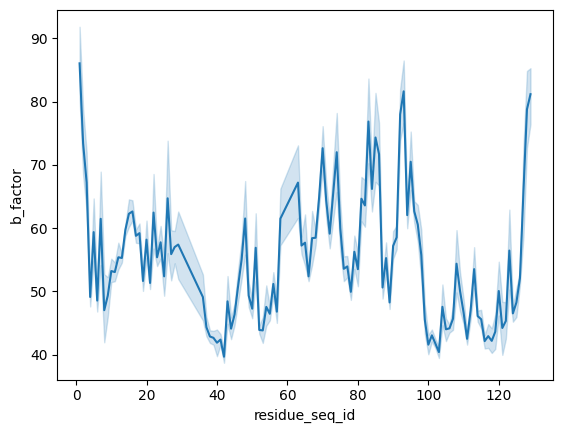

In [14]:
tcr_variable_df = tcr_df.query('residue_seq_id <= 129')
sns.lineplot(x=tcr_variable_df['residue_seq_id'], y=tcr_variable_df['b_factor'])

Computing things like contacting residues between the TCR CDR loops and the peptide is a breeze.

In [15]:
import numpy as np

In [16]:
CONTACT_DISTANCE = 5  # Angstroms (Å)


def euclidean_distance(x1: float, y1: float, z1: float, x2: float, y2: float, z2: float) -> float:
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2 + (z2 - z1) ** 2)


interface = tcr_cdrs_df.merge(peptide_df, how='cross', suffixes=('_tcr', '_peptide'))
interface['atom_distances'] = euclidean_distance(
    interface['pos_x_tcr'],
    interface['pos_y_tcr'],
    interface['pos_z_tcr'],
    interface['pos_x_peptide'],
    interface['pos_y_peptide'],
    interface['pos_z_peptide'],
)

contacting_atoms = interface[interface['atom_distances'] <= CONTACT_DISTANCE]
contacting_residues = contacting_atoms[
    [
        'chain_id_tcr',
        'residue_seq_id_tcr',
        'residue_insert_code_tcr',
        'cdr',
        'chain_type',
        'residue_seq_id_peptide',
        'residue_insert_code_peptide',
    ]
].drop_duplicates()

contacting_residues

,chain_id_tcr,residue_seq_id_tcr,residue_insert_code_tcr,cdr,chain_type,residue_seq_id_peptide,residue_insert_code_peptide
6424,E,108,None,3.0,beta,8,None
6603,E,109,None,3.0,beta,9,None
6641,E,109,None,3.0,beta,7,None
6704,E,109,None,3.0,beta,8,None
6926,E,110,None,3.0,beta,7,None
7151,E,111,None,3.0,beta,7,None
7194,E,111,None,3.0,beta,4,None
7253,E,111,None,3.0,beta,5,None
7261,E,111,None,3.0,beta,6,None
7280,E,111,None,3.0,beta,8,None


Finally, if we want to save part of the data frame as a PDB file, we can convert it back to a `Structure` object and save it to a file.  

In [17]:
import warnings

from python_pdb.entities import Structure, StructureConstructionWarning

In [18]:
# Suppressing warnings here because there are alternate locations specified in this PDB file
with warnings.catch_warnings():
    warnings.filterwarnings('ignore', category=StructureConstructionWarning)
    tcr_structure = Structure.from_pandas(tcr_df)

with open('tcr.pdb', 'w') as fh:
    fh.write(str(tcr_structure))

In [19]:
!ls | grep '.pdb'

tcr.pdb


In [20]:
!head tcr.pdb

ATOM     58  N   SER E   1      44.786  19.936  31.694  1.00 91.71           N  
ATOM     59  CA  SER E   1      43.328  20.085  31.879  1.00 88.14           C  
ATOM     60  C   SER E   1      42.582  19.234  30.860  1.00 80.31           C  
ATOM     61  O   SER E   1      41.944  19.762  29.940  1.00 81.48           O  
ATOM     62  CB  SER E   1      42.912  21.571  31.778  1.00 93.53           C  
ATOM     63  OG  SER E   1      41.483  21.690  31.841  1.00 93.62           O  
ATOM     64  N   GLN E   2      42.634  17.921  31.043  1.00 72.67           N  
ATOM     65  CA  GLN E   2      41.716  17.039  30.308  1.00 69.30           C  
ATOM     66  C   GLN E   2      40.246  17.307  30.674  1.00 66.83           C  
ATOM     67  O   GLN E   2      39.999  17.911  31.668  1.00 70.99           O  
